In [162]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

from cosmojo.defaults import *
from cosmojo.utils import *
from cosmojo.kernels import *
from cosmojo.limber import Limber
from cosmojo.universe import Cosmo
from cosmojo.survey import dNdzMagLim


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
# Initialize a cosmology class with default values
cosmo = Cosmo(lmax=4000, nonlinear=True)

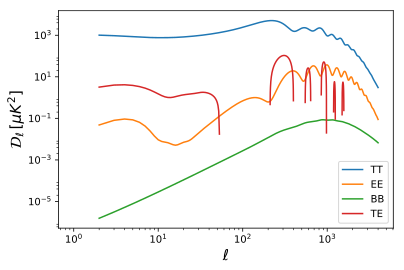

In [164]:
# Plot CMB power spectra
cls_cmb = cosmo.cmb_spectra(4000, dl=True)
plt.loglog(cls_cmb[:,0], label='TT')
plt.loglog(cls_cmb[:,1], label='EE')
plt.loglog(cls_cmb[:,2], label='BB')
plt.loglog(cls_cmb[:,3], label='TE')
plt.legend()
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$\mathcal{D}_{\ell}\,[\mu K^2]$', size=15)

In [81]:
# Creating Limber class for power spectra calculation
limber = Limber(cosmo, lmin=2, lmax=2000)

In [59]:
# Initialize a magnitude-limited redshift distribution
dndz_mag_lim_single = dNdzMagLim(a=2, z0=0.92, b=2, z_min=0., z_max=3., nbins=1)
print 'Median redshift z_med  = %.2f' %dndz_mag_lim.z_med
print 'Mean redshift   z_mean = %.2f' %dndz_mag_lim.z_mean
print ''

dndz_mag_lim = dNdzMagLim(a=2, z0=0.92, b=2, z_min=0., z_max=3., nbins=5)
print 'Median redshift z_med  = %.2f' %dndz_mag_lim.z_med
print 'Mean redshift   z_mean = %.2f' %dndz_mag_lim.z_mean
print ''

dndz_mag_lim_phz = dNdzMagLim(a=2, z0=.92, b=2, z_min=0., z_max=3., nbins=5, sigma_zph=0.05)
print 'Median redshift z_med  = %.2f' %dndz_mag_lim_phz.z_med
print 'Mean redshift   z_mean = %.2f' %dndz_mag_lim_phz.z_mean


Median redshift z_med  = 1.00
Mean redshift   z_mean = 1.04

Median redshift z_med  = 1.00
Mean redshift   z_mean = 1.04

Median redshift z_med  = 1.00
Mean redshift   z_mean = 1.04


(0, 3)

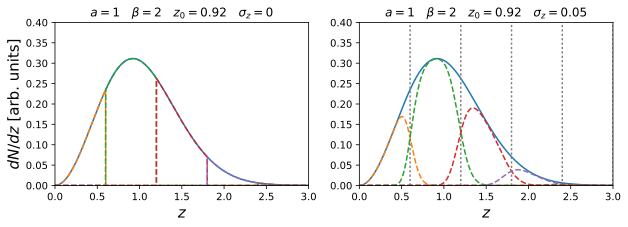

In [43]:
z = np.linspace(0,3,1000)
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.title(r'$a=1\quad\beta=2\quad z_0=0.92 \quad \sigma_z=0$')
plt.plot(z, dndz_mag_lim.raw_dndz(z))
for i in xrange(dndz_mag_lim.nbins):
    plt.plot(z, dndz_mag_lim.raw_dndz_bin(z,i), '--')
plt.xlabel(r'$z$', size=15)
plt.ylabel(r'$dN/dz$ [arb. units]', size=15)
plt.ylim([0,.4])
plt.xlim([0,3])

plt.subplot(122)
plt.title(r'$a=1\quad\beta=2\quad z_0=0.92 \quad \sigma_z=0.05$')
plt.plot(z, dndz_mag_lim_phz.raw_dndz(z))
for i in xrange(dndz_mag_lim_phz.nbins):
    plt.plot(z, dndz_mag_lim_phz.raw_dndz_bin(z,i), '--')
    plt.axvline(dndz_mag_lim_phz.bins[i+1], ls=':', color='grey')
plt.xlabel(r'$z$', size=15)
plt.ylim([0,.4])
plt.xlim([0,3])

In [60]:
# Creating galaxy object 
gals = GalsTomo(cosmo, dndz_mag_lim, b=1)
gals_phz = GalsTomo(cosmo, dndz_mag_lim_phz, b=1)
gals_single = Gals(cosmo, dndz_mag_lim_single, b=1)

In [124]:
# CMB lensing kernel
CMBlens = LensCMB(cosmo)


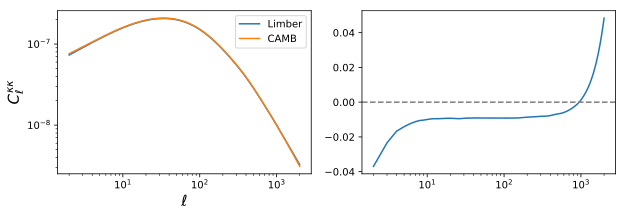

In [82]:
# CMB lensing autopower spectrum
clkk = limber.GetCl(CMBlens)
clkk_camb = cls_cmb[limber.lrange,4]

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.loglog(limber.lrange, clkk, label='Limber')
plt.loglog(limber.lrange, clkk_camb, label='CAMB')
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$C_{\ell}^{\kappa\kappa}$', size=15)
plt.legend()

plt.subplot(122)
plt.semilogx(limber.lrange, clkk/clkk_camb-1)
plt.axhline(ls='--', color='grey')

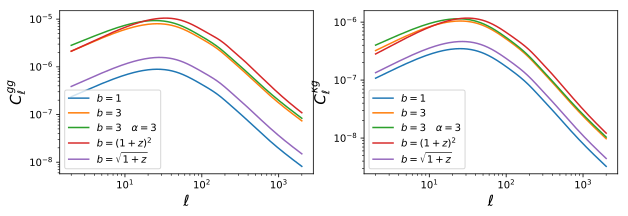

In [118]:
plt.figure(figsize=(10,3))

# Galaxy autopower spectra
plt.subplot(121)
plt.loglog(limber.lrange, limber.GetCl(gals_single), label=r'$b=1$')
plt.loglog(limber.lrange, limber.GetCl(Gals(cosmo, dndz_mag_lim_single, b=3)), label=r'$b=3$')
plt.loglog(limber.lrange, limber.GetCl(Gals(cosmo, dndz_mag_lim_single, b=3, alpha=3)), label=r'$b=3\quad \alpha=3$')
plt.loglog(limber.lrange, limber.GetCl(Gals(cosmo, dndz_mag_lim_single, b=lambda z: (1+z)**2)), label=r'$b=(1+z)^2$')
plt.loglog(limber.lrange, limber.GetCl(Gals(cosmo, dndz_mag_lim_single, b=lambda z: np.sqrt(1+z))), label=r'$b=\sqrt{1+z}$')
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$C_{\ell}^{gg}$', size=15)
plt.legend()

# CMB lensing - galaxy cross-spectra'
plt.subplot(122)
plt.loglog(limber.lrange, limber.GetCl(CMBlens, k2=gals_single), label=r'$b=1$')
plt.loglog(limber.lrange, limber.GetCl(CMBlens, k2=Gals(cosmo, dndz_mag_lim_single, b=3)), label=r'$b=3$')
plt.loglog(limber.lrange, limber.GetCl(CMBlens, k2=Gals(cosmo, dndz_mag_lim_single, b=3, alpha=3)), label=r'$b=3\quad \alpha=3$')
plt.loglog(limber.lrange, limber.GetCl(CMBlens, k2=Gals(cosmo, dndz_mag_lim_single, b=lambda z: (1+z)**2)), label=r'$b=(1+z)^2$')
plt.loglog(limber.lrange, limber.GetCl(CMBlens, k2=Gals(cosmo, dndz_mag_lim_single, b=lambda z: np.sqrt(1+z))), label=r'$b=\sqrt{1+z}$')
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$C_{\ell}^{\kappa g}$', size=15)
plt.legend()



In [139]:
# Creating galaxy lensing object 
gals_lens = LensGal(cosmo, dndz_mag_lim)
gals_lens_phz = LensGalTomo(cosmo, dndz_mag_lim_phz)



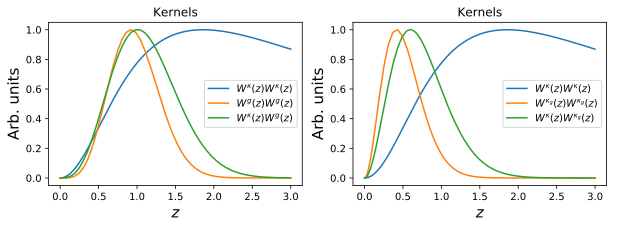

In [125]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.title('Kernels')
plt.plot(z, CMBlens.W_z(z)**2/np.max(CMBlens.W_z(z)**2), label=r'$W^{\kappa}(z)W^{\kappa}(z)$')
plt.plot(z, gals_single.W_z(z)**2/np.max(gals_single.W_z(z)**2), label=r'$W^{g}(z)W^{g}(z)$')
plt.plot(z, gals_single.W_z(z)*CMBlens.W_z(z)/np.max(gals_single.W_z(z)*CMBlens.W_z(z)), label=r'$W^{\kappa}(z)W^{g}(z)$')
plt.xlabel(r'$z$', size=15)
plt.ylabel('Arb. units', size=15)
plt.legend()

plt.subplot(122)
plt.title('Kernels')
plt.plot(z, CMBlens.W_z(z)**2/np.max(CMBlens.W_z(z)**2), label=r'$W^{\kappa}(z)W^{\kappa}(z)$')
plt.plot(z, gals_lens.W_z(z)**2/np.max(gals_lens.W_z(z)**2), label=r'$W^{\kappa_g}(z)W^{\kappa_g}(z)$')
plt.plot(z, gals_lens.W_z(z)*CMBlens.W_z(z)/np.max(gals_lens.W_z(z)*CMBlens.W_z(z)), label=r'$W^{\kappa}(z)W^{\kappa_g}(z)$')
plt.xlabel(r'$z$', size=15)
plt.ylabel('Arb. units', size=15)
plt.legend()


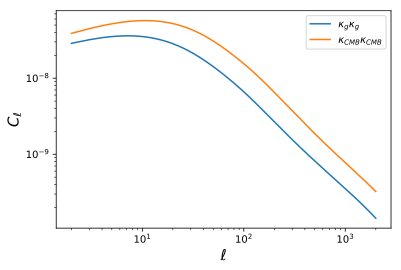

In [130]:
plt.loglog(limber.lrange, limber.GetCl(gals_lens), label=r'$\kappa_g\kappa_g$')
plt.loglog(limber.lrange, limber.GetCl(CMBlens, k2=gals_lens), label=r'$\kappa_{CMB}\kappa_{CMB}$')
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$C_{\ell}$', size=15)
plt.legend()





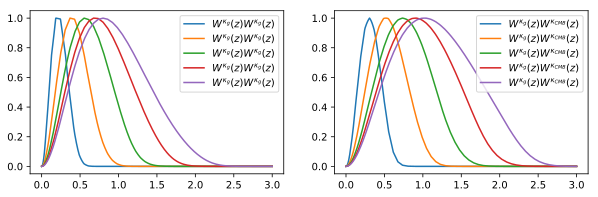

In [161]:
plt.figure(figsize=(10,3))

plt.subplot(121)
for i in xrange(gals_lens_phz.nbins):
#     plt.loglog(limber.lrange, limber.GetCl(gals_lens_phz, i=i), label=i)
    plt.plot(z, gals_lens_phz.W_z(z,i)**2/np.max(gals_lens_phz.W_z(z,i)**2), label=r'$W^{\kappa_g}(z)W^{\kappa_g}(z)$')
    
plt.legend()

plt.subplot(122)
for i in xrange(gals_lens_phz.nbins):
#     plt.loglog(limber.lrange, limber.GetCl(gals_lens_phz, i=i), label=i)
    plt.plot(z, gals_lens_phz.W_z(z,i)*CMBlens.W_z(z)/np.max(gals_lens_phz.W_z(z,i)*CMBlens.W_z(z)), label=r'$W^{\kappa_g}(z)W^{\kappa_{CMB}}(z)$')

plt.legend()

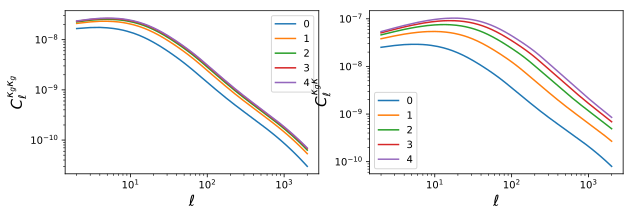

In [160]:
plt.figure(figsize=(10,3))

# Galaxy lensing spectra
plt.subplot(121)
for i in xrange(gals_lens_phz.nbins):
    plt.loglog(limber.lrange, limber.GetCl(gals_lens_phz, i=i), label=i)
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$C_{\ell}^{\kappa_g\kappa_g}$', size=15)
plt.legend()

# CMB lensing - galaxy lensing cross-spectra'
plt.subplot(122)
for i in xrange(gals_lens_phz.nbins):
    plt.loglog(limber.lrange, limber.GetCl(CMBlens, k2=gals_lens_phz, j=i), label=i)
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$C_{\ell}^{\kappa_g \kappa}$', size=15)
plt.legend()